In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
link='https://raw.githubusercontent.com/WidhyaOrg/datasets/master/covid19.csv'
df=pd.read_csv(link,index_col='Sno')

In [3]:
df.head()

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
Sno,,,,,,
1,30/01/20,Kerala,1,0,0,0
2,31/01/20,Kerala,1,0,0,0
3,01/02/20,Kerala,2,0,0,0
4,02/02/20,Kerala,3,0,0,0
5,03/02/20,Kerala,3,0,0,0


In [4]:
df.describe()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
count,270.000000,270.000000,270.000000,270.000000
mean,5.551852,1.329630,0.603704,0.092593
std,8.339625,3.587288,1.461522,0.290399
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000
75%,6.000000,0.000000,0.000000,0.000000
max,60.000000,14.000000,9.000000,1.000000


In [5]:
df1=df.groupby('Date',sort=False).sum()
df1.head()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
Date,,,,
30/01/20,1,0,0,0
31/01/20,1,0,0,0
01/02/20,2,0,0,0
02/02/20,3,0,0,0
03/02/20,3,0,0,0


In [6]:
df2=pd.DataFrame(df1.sum(axis=1))
df2.columns=['Total_Cases']
df2.tail()


,Total_Cases
Date,
17/03/20,154
18/03/20,168
19/03/20,197
20/03/20,250
21/03/20,310


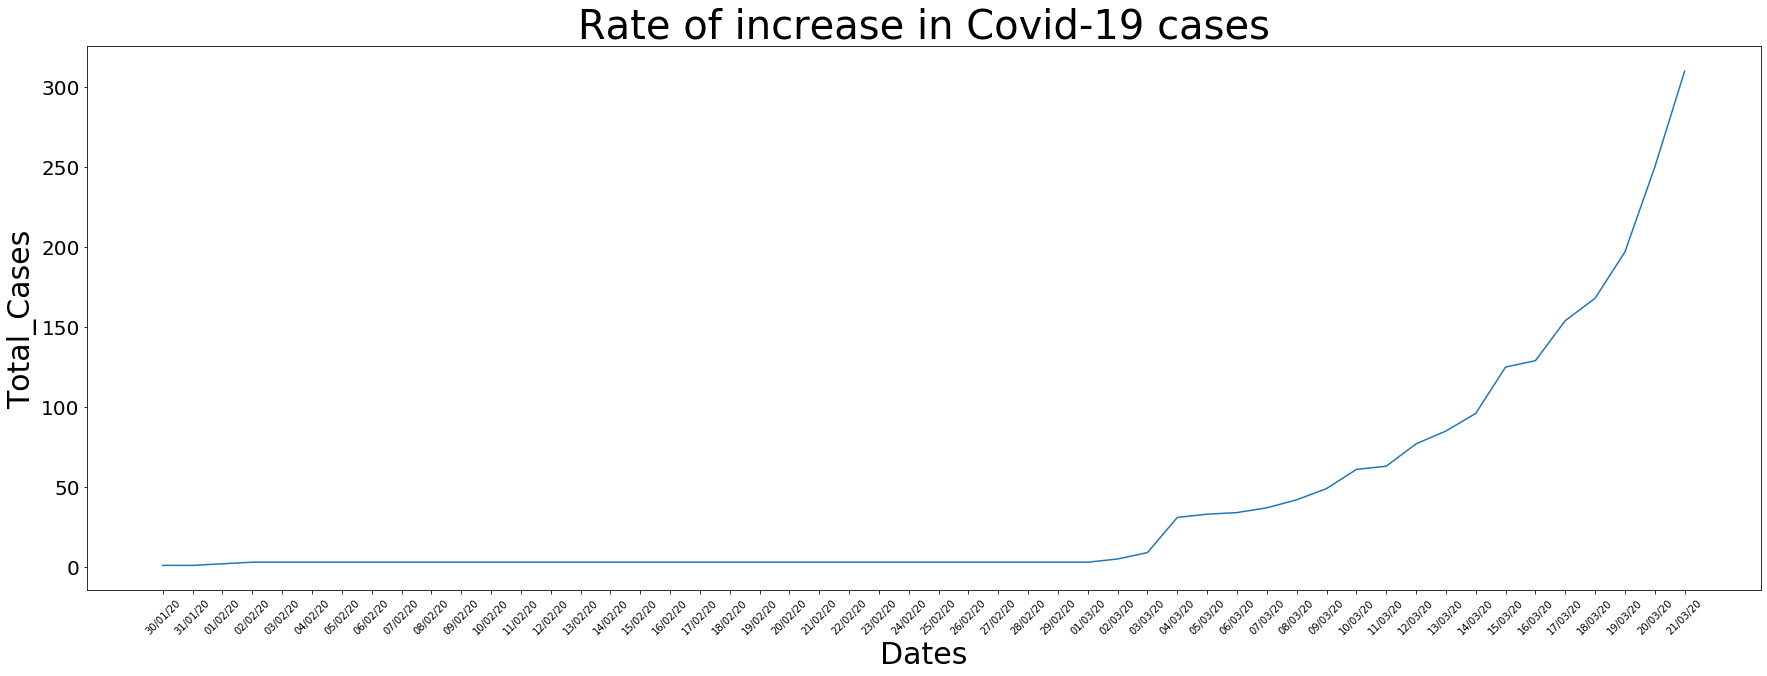

In [7]:
plt.figure(figsize=(30,10))
sns.lineplot(x=df2.index,y=df2.Total_Cases,sort=False)
#plt.plot(df2)
plt.xticks(rotation=45)
plt.yticks(fontsize=20)
plt.xlabel('Dates',fontsize=30)
plt.ylabel('Total_Cases',fontsize=30)
plt.title("Rate of increase in Covid-19 cases",fontsize=40)
plt.show()

In [8]:
date_li=list(df2.index)
date_li=date_li[date_li.index('04/03/20'):]
rate_li=[]
for i in range(len(date_li)-1):
    prev=int(df2[df2.index==date_li[i]].Total_Cases)
    nex=int(df2[df2.index==date_li[i+1]].Total_Cases)
    rate_li.append(round((nex-prev)/prev,3))
print('Rate of increase per day from "04/03/20" to "21/03/20"--\n',rate_li )


Rate of increase per day from "04/03/20" to "21/03/20"--
 [0.065, 0.03, 0.088, 0.135, 0.167, 0.245, 0.033, 0.222, 0.104, 0.129, 0.302, 0.032, 0.194, 0.091, 0.173, 0.269, 0.24]


In [9]:
avg=sum(rate_li)/len(rate_li)
print('Rate of increase:',round(avg,3))

Rate of increase: 0.148


In [10]:
P_o=df2[df2.index=='04/03/20'].Total_Cases
P_t=P_o*(2.71**(avg*26))
int(P_t)

1443